In [53]:
#House price prediction
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn for statistical plots
import seaborn as sns

#importing model libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#sklearns package for data splitting 
from sklearn.model_selection import train_test_split

#import data
df= pd.read_csv('E:\Sakshi\Kaggle-House price Prediction_Australia/data.csv')
print(df.shape)


(4600, 18)


In [54]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [55]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [57]:
#check any missing value
df.isna().sum().sum()


0

In [58]:
#feature extraction
import datetime as dt
df['date'] = df['date'].astype('datetime64')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.drop('date', axis= 1, inplace = True)
df['built age'] = df['year']- df['yr_built']

In [59]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,built age
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,59
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,38


In [60]:
#check no of renovated house
df[df['yr_renovated']<1].count()['price']

2735

In [61]:
#check no of unique cities
df['city'].nunique()

44

In [62]:
df.groupby('city').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,month,built age
city,,,,,,,,,,,,,,,,
Algona,2.072880e+05,3.200000,1.900000,1608.600000,11494.200000,1.400000,0.000000,0.000000,3.200000,1608.600000,0.000000,1983.200000,800.400000,2014.0,5.000000,30.800000
Auburn,2.993404e+05,3.420455,2.092330,2019.579545,24999.221591,1.448864,0.000000,0.125000,3.409091,1862.250000,157.329545,1980.795455,725.761364,2014.0,5.806818,33.204545
Beaux Arts Village,7.450000e+05,3.000000,1.750000,1490.000000,9800.000000,1.000000,0.000000,0.000000,4.000000,1140.000000,350.000000,1947.000000,1988.000000,2014.0,5.000000,67.000000
Bellevue,8.471807e+05,3.804196,2.453671,2694.527972,13741.178322,1.398601,0.006993,0.391608,3.590909,2182.604895,511.923077,1973.814685,823.517483,2014.0,5.783217,40.185315
Black Diamond,3.396056e+05,3.222222,1.750000,1863.333333,25006.666667,1.388889,0.000000,0.000000,3.222222,1807.777778,55.555556,1978.666667,1107.333333,2014.0,6.000000,35.333333
Bothell,4.814419e+05,3.606061,2.431818,2319.393939,9060.181818,1.500000,0.000000,0.000000,3.151515,1957.878788,361.515152,1982.696970,727.151515,2014.0,6.000000,31.303030
Burien,3.489472e+05,3.337838,1.746622,1815.337838,12158.554054,1.209459,0.040541,0.540541,3.554054,1468.445946,346.891892,1957.351351,1183.945946,2014.0,5.797297,56.648649
Carnation,5.087520e+05,3.090909,2.170455,2392.454545,64873.772727,1.522727,0.000000,0.318182,3.090909,2205.181818,187.272727,1982.818182,727.318182,2014.0,5.636364,31.181818
Clyde Hill,1.321945e+06,4.181818,2.613636,3620.909091,19633.909091,1.181818,0.000000,0.818182,3.545455,2522.727273,1098.181818,1964.454545,1092.000000,2014.0,5.818182,49.545455


In [63]:
#drop unnessecary columns
df.drop(['yr_built','statezip','country', 'street'], axis = 1, inplace = True)


In [64]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,year,month,built age
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,Shoreline,2014,5,59
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,Seattle,2014,5,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,Kent,2014,5,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,Bellevue,2014,5,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,Redmond,2014,5,38


In [65]:
#checking unique
print("Bedrooms:",df['bedrooms'].nunique())
print("Bathrooms:",df['bathrooms'].nunique())
print("Floors:",df['floors'].nunique())
print("Waterfront:",df['waterfront'].nunique())
print("View:",df['view'].nunique())
print("Condition:",df['condition'].nunique())


Bedrooms: 10
Bathrooms: 26
Floors: 6
Waterfront: 2
View: 5
Condition: 5


In [66]:
df['city']= df['city'].astype('category')
df['bedrooms']= df['bedrooms'].astype('category')
df['bathrooms']= df['bathrooms'].astype('category')
df['floors']= df['floors'].astype('category')
df['waterfront']= df['waterfront'].astype('category')
df['view']= df['view'].astype('category')
df['condition']= df['condition'].astype('category')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          4600 non-null   float64 
 1   bedrooms       4600 non-null   category
 2   bathrooms      4600 non-null   category
 3   sqft_living    4600 non-null   int64   
 4   sqft_lot       4600 non-null   int64   
 5   floors         4600 non-null   category
 6   waterfront     4600 non-null   category
 7   view           4600 non-null   category
 8   condition      4600 non-null   category
 9   sqft_above     4600 non-null   int64   
 10  sqft_basement  4600 non-null   int64   
 11  yr_renovated   4600 non-null   int64   
 12  city           4600 non-null   category
 13  year           4600 non-null   int64   
 14  month          4600 non-null   int64   
 15  built age      4600 non-null   int64   
dtypes: category(7), float64(1), int64(8)
memory usage: 359.1 KB


In [68]:
df[df.duplicated()].sum().sum()


0.0

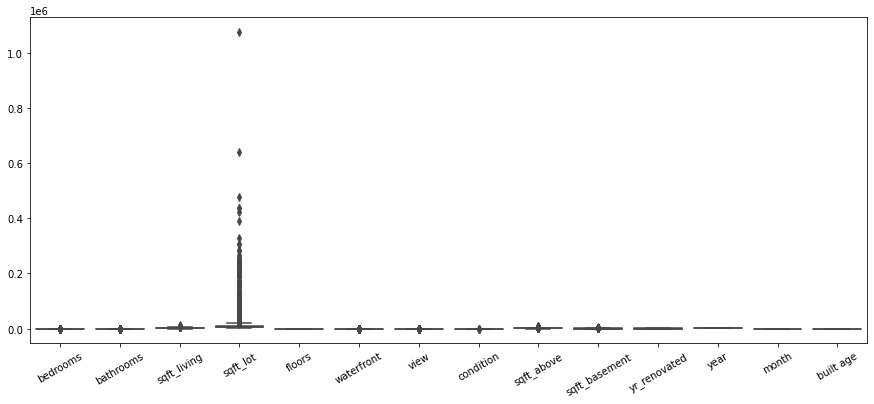

In [69]:
#lets observe any outliers using boxplot
df_check= df.drop('price', axis = 1)
plt.subplots(figsize=(15,6))
x= sns.boxplot(data = df_check)
x.set_xticklabels(x.get_xticklabels(),rotation= 30);

In [70]:
#inputting mean value for sqft_lot
for x in ['sqft_lot']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    
    max= q75+(1.5*intr_qr)
    min= q25-(1.5*intr_qr)
    
    df.loc[df[x] < min,x] =np.nan
    df.loc[df[x] > max,x] = np.nan
    
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot'].mean())

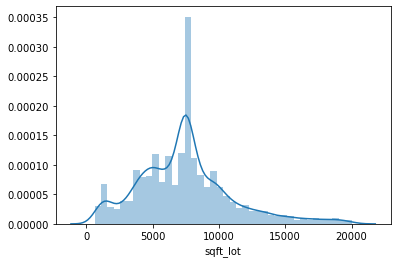

In [71]:
sns.distplot(df['sqft_lot'])

In [72]:
#inputting mean value for sqft_living
for x in ['sqft_living']:
    q75,q25= np.percentile(df.loc[:,x],[75,25])
    intr_qtl= q75-q25
    
    max= q75+(1.5*intr_qtl)
    min= q25-(1.5*intr_qtl)
    
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    
    df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].mean())

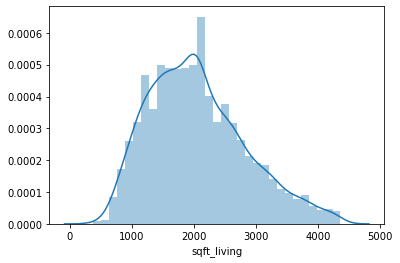

In [73]:
sns.distplot(df['sqft_living'])

In [74]:
#removing outliers from sqft_above
for x in ['sqft_above']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = 75-25
    
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    
    df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].mean())

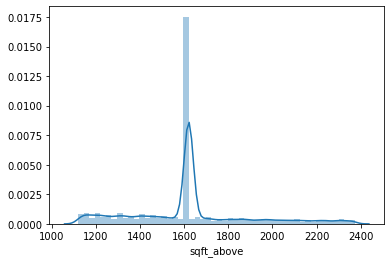

In [75]:
sns.distplot(df['sqft_above'])

In [76]:
#inputting mean value for sqft_basement
for x in ['sqft_basement']:
    
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = 75-25

    min = q25-(1.5*intr_qr)
    max = q75+(1.5*intr_qr)
    
    df.loc[df[x] > max,x] = np.nan
    df.loc[df[x] < min,x] = np.nan
    
    df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mean())



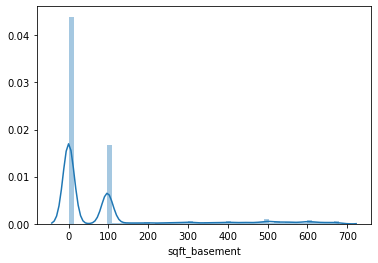

In [77]:
sns.distplot(df['sqft_basement'])

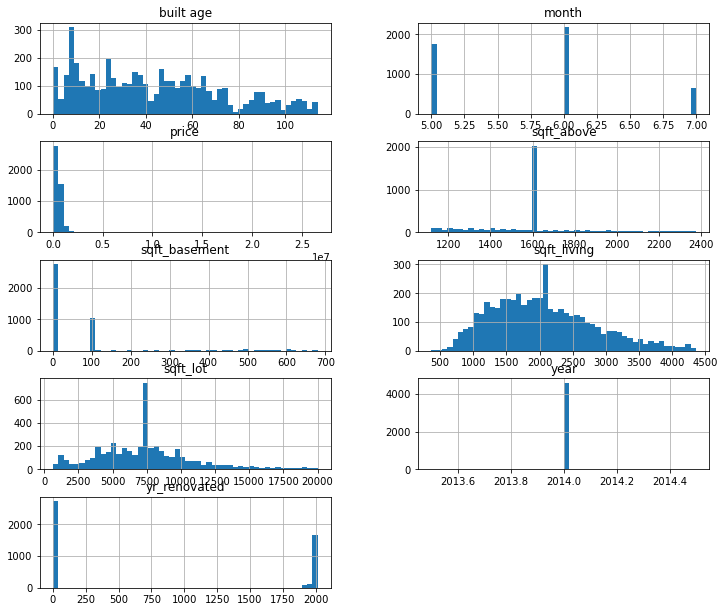

In [78]:
columns = list(df)
df[columns].hist(stacked= False, bins = 50, figsize = (12,30), layout = (14,2));

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


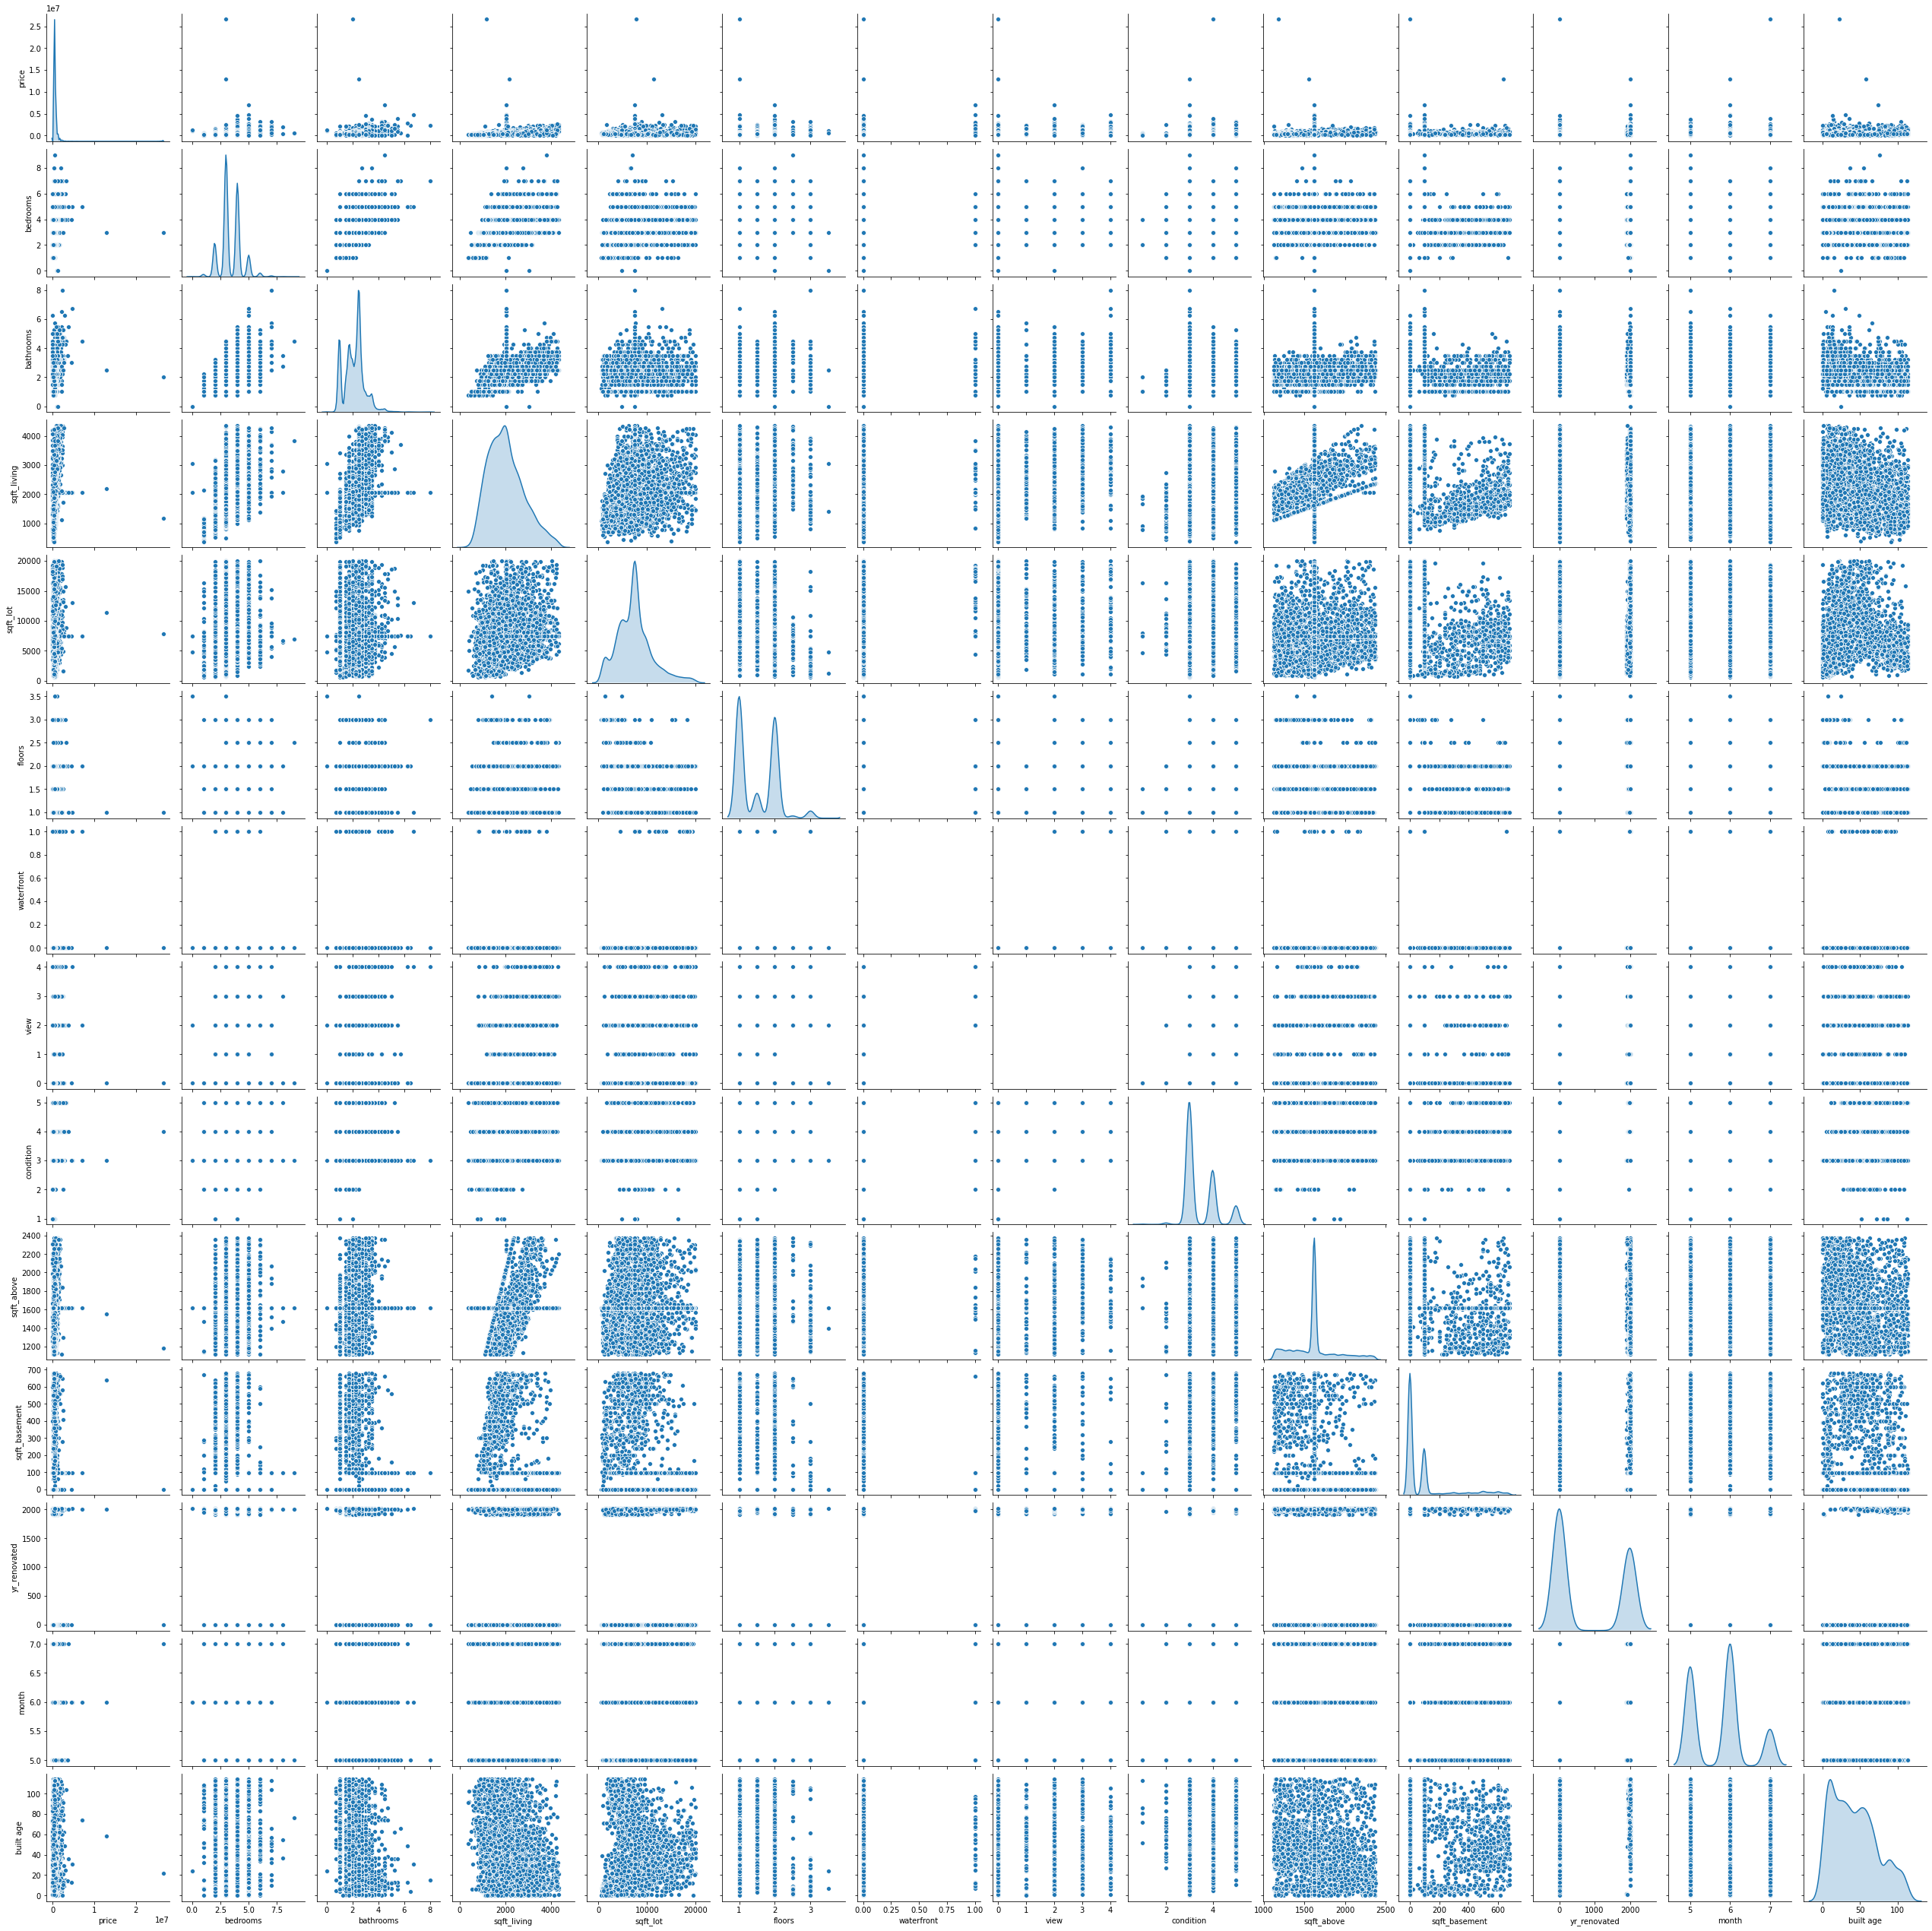

In [81]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [83]:
df.drop('year', axis = 1, inplace= True)
df.corr()

KeyError: "['year'] not found in axis"

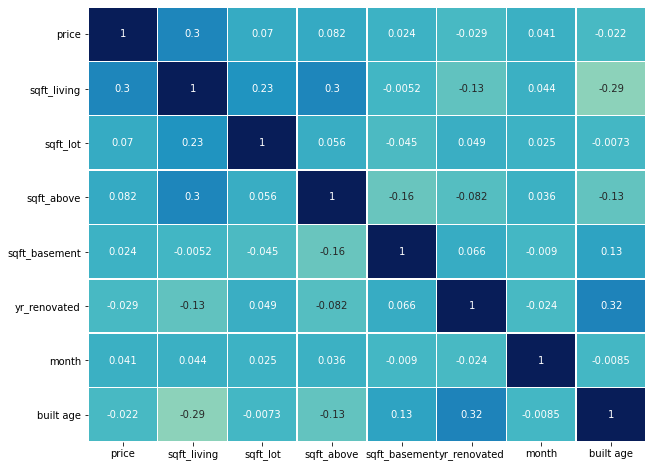

In [84]:
plt.figure(figsize = (10,8))

sns.heatmap(df.corr(),
            annot= True,
           linewidths = .5,
           center = 0,
           cbar = False,
           cmap = "YlGnBu")

plt.show()

In [85]:
df.drop('sqft_above',axis=1,inplace=True)

In [86]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_renovated,city,month,built age
0,313000.0,3.0,1.50,1340.0,7912.0,1.5,0,0,3,0.000000,2005,Shoreline,5,59
1,2384000.0,5.0,2.50,3650.0,9050.0,2.0,0,4,5,280.000000,0,Seattle,5,93
2,342000.0,3.0,2.00,1930.0,11947.0,1.0,0,0,4,0.000000,0,Kent,5,48
3,420000.0,3.0,2.25,2000.0,8030.0,1.0,0,0,4,97.050533,0,Bellevue,5,51
4,550000.0,4.0,2.50,1940.0,10500.0,1.0,0,0,4,97.050533,1992,Redmond,5,38


In [87]:
#prepare data
#create dummies
df = pd.get_dummies(df)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 105 entries, price to city_Yarrow Point
dtypes: float64(4), int64(3), uint8(98)
memory usage: 691.9 KB


In [89]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_renovated',
       'month', 'built age', 'bedrooms_0.0', 'bedrooms_1.0', 'bedrooms_2.0',
       ...
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
      dtype='object', length=105)

In [90]:
#splitting into test and train set
from sklearn.model_selection import train_test_split

#features = [col for col in df.columns if col != 'price']
features = [col for col in df.columns if col != 'price']

X_train, X_test, y_train, y_test= train_test_split(df[features], df['price'], test_size = .2, random_state=22)
X_train.shape, X_test.shape

((3680, 104), (920, 104))

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)  

#print("Intercept of linear equation:",linearregression.intercept_)
#print("Coefficients of the equation are :",linearregression.coef_)

#print("Intercept of the linear equation:", linearregression.intercept_) 
#print("\nCoefficients of the equation are:", linearregression.coef_)

pred= linearregression.predict(X_test)
m0= 'LinearRegression'

#Mean Absolute Error
m1= "{:.2f}".format(mean_absolute_error(y_test, pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test,pred))

#RMSE
m2= mean_squared_error(y_test, pred)**0.5
print("RMSE:", mean_squared_error(y_test,pred)**0.5)

#R2 squared
m3 = r2_score(y_test, pred)
print("R2 Squared - score:", r2_score(y_test,pred))

#training Score
m4 = "{:.2f}".format(linearregression.score(X_train,y_train))
print("Training score:", linearregression.score(X_train,y_train))

#Testing score
m5= "{:.2f}".format(linearregression.score(X_test,y_test))
print("Testing Score:", linearregression.score(X_test,y_test))




Mean Absolute Error: 142998.14943140303
RMSE: 262852.8040089283
R2 Squared - score: 0.4787747992341833
Training score: 0.22160923478544603
Testing Score: 0.4787747992341833


In [98]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

#create a regressor object
DTregressor = DecisionTreeRegressor(random_state = 0)

#fit the regressor with X and Y data
DTregressor.fit(X_train, y_train)

DT_y_pred = DTregressor.predict(X_test)

In [102]:
m0= 'Decision Tree'

#Meam Absolute Error
m1= "{:.2f}".format(mean_absolute_error(y_test,DT_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, DT_y_pred))

#RMSE
m2 = mean_squared_error(y_test, DT_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test,DT_y_pred)**0.5)

#r2 squared
m3 = r2_score(y_test, DT_y_pred)
print("\nR squared:", r2_score(y_test, DT_y_pred))

#traning score
m4 = "{:.2f}".format(DTregressor.score(X_train, y_train))
print("\nTraining score:", m4)

#testing score
m5 = "{:.2f}".format(DTregressor.score(X_test, y_test))
print("\n Testing score:", m5)


Mean Absolute Error: 157945.90941811955

RMSE: 285339.6840172686

R squared: 0.3857791867124619

Training score: 1.00

Training Score: 1.00

 Testing score: 0.39


In [104]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RFregressor = RandomForestRegressor(max_depth = 2, random_state = 0)
RFregressor.fit(X_train, y_train)

RF_y_pred = RFregressor.predict(X_test)

In [106]:
m0= 'Random Forest'

#Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, RF_y_pred))
print("\n Mean Absolute Error:", m1)

#RMSE
m2 = mean_squared_error(y_test, RF_y_pred)**0.5
print("\n RMSE:", m2)

#R_squared
m3 = r2_score(y_test, RF_y_pred)
print("\n R squared:", m3)

#Trainig score
m4 = "{:.2f}".format(RFregressor.score(X_train, y_train))
print("\n Training score:", m4)

#Testing score
m5= "{:.2f}".format(RFregressor.score(X_test, y_test))
print("\n Testing score:", m5)


 Mean Absolute Error: 184425.85

 RMSE: 294130.53079674183

 R squared: 0.3473499281761072

 Training score: 0.13

 Testing score: 0.35


In [107]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

GBregressor = GradientBoostingRegressor(random_state=0)
GBregressor.fit(X_train, y_train)

GB_y_pred = GBregressor.predict(X_test)

In [108]:
m0 = 'Gradient Boosting'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, GB_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, GB_y_pred))
# RMSE
m2 = mean_squared_error(y_test, GB_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, GB_y_pred)**0.5)
# R2 Squared:
m3 = r2_score(y_test, GB_y_pred)
print("\nR2 Squared - Score:", r2_score(y_test, GB_y_pred))
# Training Score
m4 = "{:.2f}".format(GBregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (GBregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(GBregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (GBregressor.score(X_test, y_test)))
#print(y_pred)


Mean Absolute Error: 134670.5791228998

RMSE: 251129.22252253364

R2 Squared - Score: 0.5242325994457282

Training Score: 0.54

Testing score: 0.52


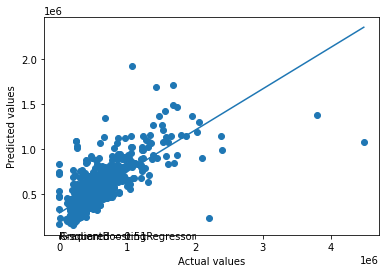

In [109]:
import numpy as np
import matplotlib.pyplot as plt7

Y_test = np.random.rand(100) # Random Data
Y_pred = Y_test + np.random.rand(100)*0.1 # Random Data

r_squared = 0.514898528849494
plt7.scatter(y_test,GB_y_pred)
plt7.xlabel('Actual values')
plt7.ylabel('Predicted values')

plt7.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, GB_y_pred, 1))(np.unique(y_test)))

plt7.text(40, 20, 'R-squared = %0.2f' % r_squared)
plt7.text(40, 10, 'GradientBoostingRegressor')
plt7.show()

In [110]:
#Functional Programming

#1. load dataframe
def load_data(df_path):
    return pd.read_csv(df_path)

#2. feature extraction
def date_features(df,col):
    df = df.copy()
    import datetime as dt
    df[col] = df[col].astype('datetime64')
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df.drop(col,axis=1,inplace=True)
    df['built age']=df['year']-df['yr_built']
    return df

def data_cleanup (df):
    df=df.copy()
    df['city']=df['city'].astype('category')
    df['bedrooms']=df['bedrooms'].astype('category')
    df['bathrooms']=df['bathrooms'].astype('category')
    df['floors']=df['floors'].astype('category')
    df['waterfront']=df['waterfront'].astype('category')
    df['view']=df['view'].astype('category')
    df['condition']=df['condition'].astype('category')
    df.drop(['yr_built','street','statezip','country'],axis=1,inplace=True)
    return df